Project Statement: 

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level. 

Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.  

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period. 

As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to 

Perform data quality check by checking for missing values if any. 

Understand what factors contributed most to employee turnover by EDA. 

Perform clustering of Employees who left based on their satisfaction and evaluation. 

Handle the left Class Imbalance using SMOTE technique. 

Perform k-fold cross-validation model training and evaluate performance.  

Identify the best model and justify the evaluation metrics used.  

Suggest various retention strategies for targeted employees. 

In [60]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import warnings 
warnings.filterwarnings('ignore')

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import pandas as pd
df=pd.read_excel('hr_comma_sep.xlsx')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# EDA

In [15]:
df.shape

(14999, 10)

In [17]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [19]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

No NAn values found in dataset

In [20]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [21]:
df=df.rename(columns={'sales':'department'})
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
print(df.department.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [23]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [24]:
print(set(df['department']))

{'product_mng', 'accounting', 'marketing', 'RandD', 'technical', 'management', 'support', 'IT', 'hr', 'sales'}


In [25]:
df['department'] = np.where(df['department'] == 'support', 'technical', df['department'])
df['department'] = np.where(df['department'] == 'IT', 'technical', df['department'])

In [26]:
df['department'].value_counts()

technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [28]:
#check for duplicate 
df_duplicates = df[df.duplicated()]
df_duplicates

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1189,0.36,0.51,2,155,3,0,1,0,technical,low
1213,0.38,0.55,2,134,3,0,1,0,technical,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,technical,low
14995,0.37,0.48,2,160,3,0,1,0,technical,low
14996,0.37,0.53,2,143,3,0,1,0,technical,low
14997,0.11,0.96,6,280,4,0,1,0,technical,low


In [29]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11987 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11987 non-null  float64
 1   last_evaluation        11987 non-null  float64
 2   number_project         11987 non-null  int64  
 3   average_montly_hours   11987 non-null  int64  
 4   time_spend_company     11987 non-null  int64  
 5   Work_accident          11987 non-null  int64  
 6   left                   11987 non-null  int64  
 7   promotion_last_5years  11987 non-null  int64  
 8   department             11987 non-null  object 
 9   salary                 11987 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


# VISUALIZATION 

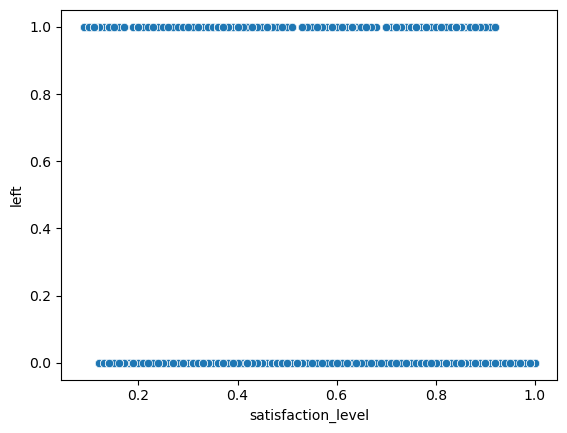

In [32]:
sns.scatterplot(data=df,x='satisfaction_level',y='left');

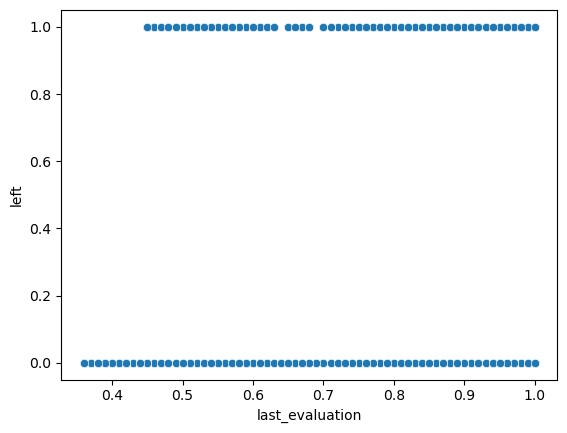

In [33]:
sns.scatterplot(data=df,x='last_evaluation',y='left');

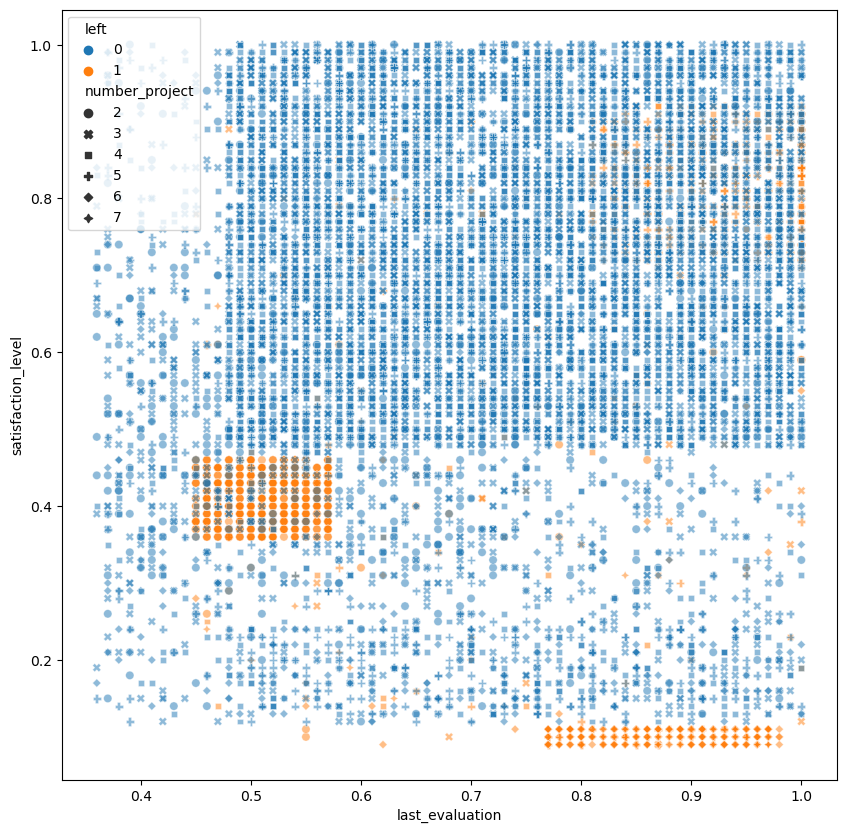

In [37]:
plt.figure(figsize=[10,10])
sns.scatterplot(data = df, x = 'last_evaluation', y = 'satisfaction_level', hue='left', alpha=0.5, style='number_project');

In [38]:
# Employees handling more than 5 projects left even though their last evaluation was good.
# Overall their statisfaction level was low

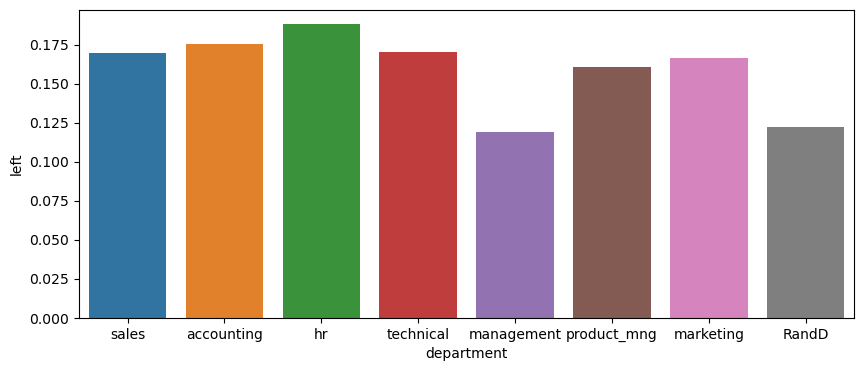

In [39]:
plt.figure(figsize=[10,4])
ax = sns.barplot(data = df, x = 'department', y = 'left', ci=0);
plt.show()

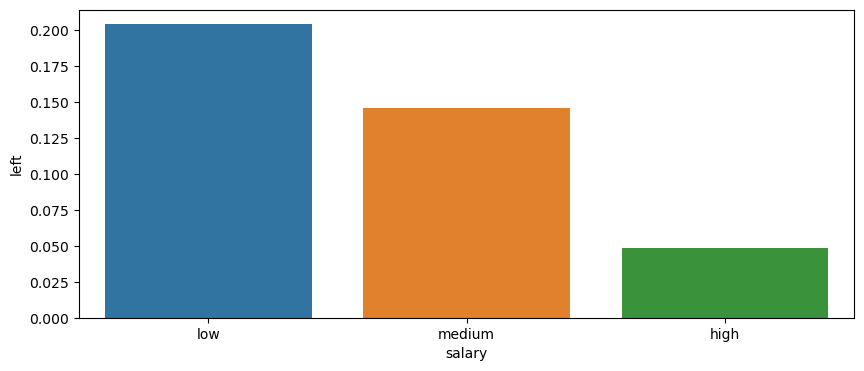

In [40]:
plt.figure(figsize=[10,4])
ax = sns.barplot(data = df, x = 'salary', y = 'left', ci=0);
plt.show()

In [41]:
# PPl with low salaries have left the most

In [42]:
# Highest attrition is from the HR department

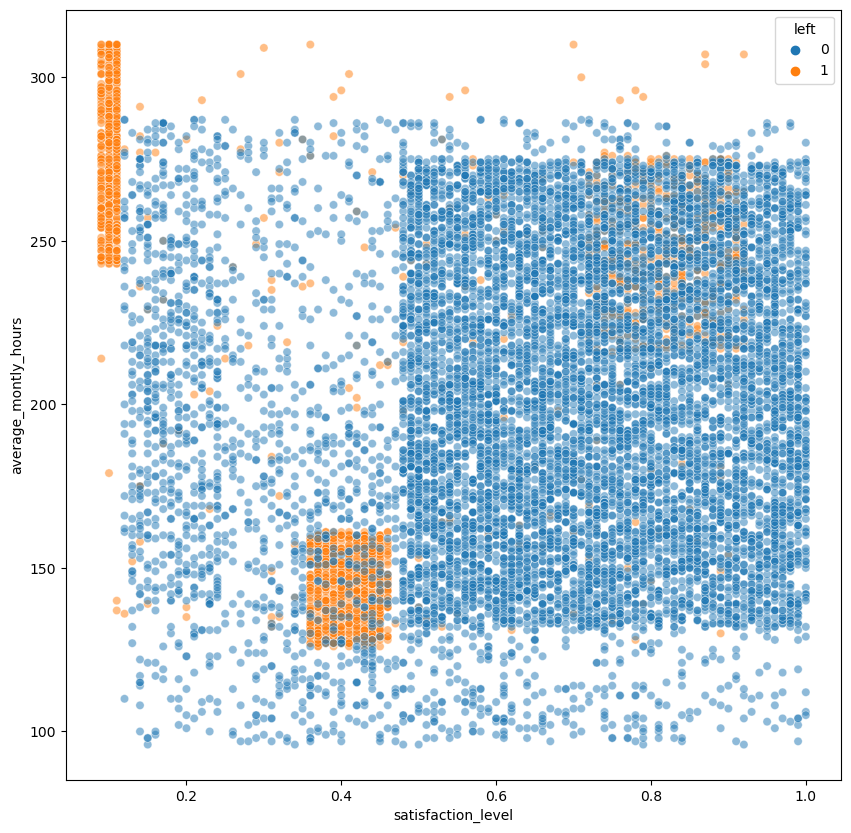

In [43]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=df, x='satisfaction_level', y='average_montly_hours', hue='left', alpha=0.5);

# CONVERTING CATEGORICAL COLUMNS TO NUMERICAL COLUMNS

In [44]:
print(set(df['department']))

{'product_mng', 'accounting', 'marketing', 'RandD', 'technical', 'management', 'hr', 'sales'}


In [45]:
print(set(df['salary']))

{'high', 'low', 'medium'}


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['department'] = le.fit_transform(df['department'])
df['salary'] = le.fit_transform(df['salary'])

In [47]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,6,1
1,0.80,0.86,5,262,6,0,1,0,6,2
2,0.11,0.88,7,272,4,0,1,0,6,2
3,0.72,0.87,5,223,5,0,1,0,6,1
4,0.37,0.52,2,159,3,0,1,0,6,1


In [48]:
#check for outliers 

<AxesSubplot:>

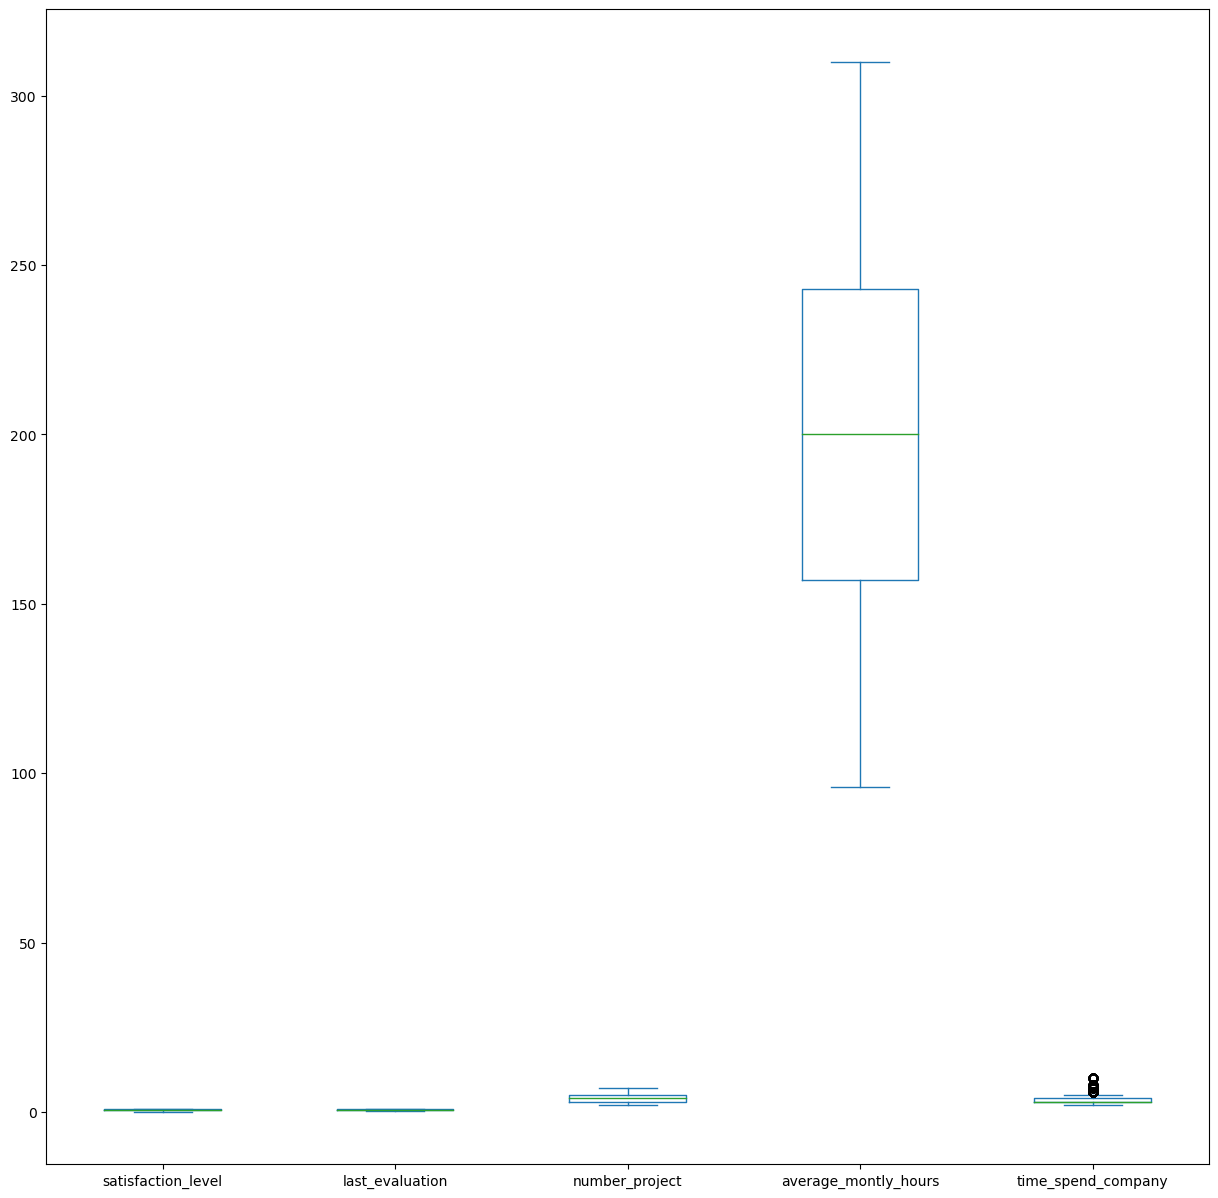

In [49]:
plt.rcParams["figure.figsize"] = [15, 15]
df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']].plot(kind = 'box')

In [50]:
def outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[ ( (df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR)) ) ]
    lwr = q1 - 1.5 * IQR
    upr = q3 + 1.5 * IQR
    return outliers, lwr, upr

In [51]:
out_tsc, lwrRange, uprRange = outliers(df['time_spend_company'])
print('Total Outliers: ' + str(len(out_tsc)))
print('LowerRange in hdlngth: ' + str(round(lwrRange,1)))
print('UpperRange in hdlngth: ' + str(round(uprRange,1)))

Total Outliers: 824
LowerRange in hdlngth: 1.5
UpperRange in hdlngth: 5.5


In [52]:
df[ (df['time_spend_company'] < lwrRange) | (df['time_spend_company'] > uprRange) ]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,6,2
17,0.78,0.99,4,255,6,0,1,0,6,1
34,0.84,0.87,4,246,6,0,1,0,2,1
47,0.57,0.70,3,273,6,0,1,0,7,1
67,0.90,0.98,4,264,6,0,1,0,5,2
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,3,0
11995,0.90,0.55,3,259,10,1,0,1,3,0
11996,0.74,0.95,5,266,10,0,0,1,3,0
11997,0.85,0.54,3,185,10,0,0,1,3,0


In [53]:
# df.drop(df[ (df['time_spend_company'] < lwrRange) | (df['time_spend_company'] > 

# CHECK FOR IMBALANCE DATASET

In [54]:
x=df.drop('left',axis=1)
y=df['left']

In [56]:
len(x.columns)

9

In [57]:
y.value_counts()

0    10000
1     1987
Name: left, dtype: int64

# FEATURE SELECTION TECHNIQUE

In [62]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [63]:
backward_feature_selector = SequentialFeatureSelector(LogisticRegression(),
                                                     k_features=(1, 9),
                                                     forward=False,
                                                     scoring='accuracy').fit(x, y)

print(backward_feature_selector.k_feature_idx_)
print(backward_feature_selector.k_feature_names_)
print(backward_feature_selector.k_score_)


(0,)
('satisfaction_level',)
0.8704427239637538


In [64]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [65]:
new_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary']

In [66]:
X = df[new_cols]
y = df['left']

# split the dataset into Train and Test 

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building

In [68]:
from sklearn.model_selection import cross_val_score

# LOGISTIC REGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train , y_train)
model_logistic.score(X_train, y_train)

0.8376638855780691

In [71]:
model_logistic.score(X_test, y_test)

0.8348623853211009

Accuracy score of logistic regression is 83%

# DECISION TREE 

In [72]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train , y_train)
model_tree.score(X_train, y_train)

1.0

In [73]:
model_tree.score(X_test, y_test)

0.9721990547678621

THIS IS OVERFITTED MODEL

# RANDOM FOREST 

In [74]:
from sklearn.ensemble import RandomForestClassifier
# model_rf = RandomForestClassifier(n_estimators=10, max_depth=4)
model_rf = RandomForestClassifier(n_estimators=10)
model_rf.fit(X_train , y_train)
model_rf.score(X_train, y_train)

0.9970202622169249

In [75]:
model_rf.score(X_test, y_test)

0.9824854045037531

In [76]:
# Accuracy Score of the Random Forest is around 94% after pruning to 4 leve

# CROSS VALIDATION

In [77]:
cross_val_score(model_logistic, X_test, y_test, cv = 5).mean()

0.8248585999072786

In [78]:
cross_val_score(model_tree, X_test, y_test, cv = 5).mean()

0.9624675475197033

In [79]:
cross_val_score(model_rf, X_test, y_test, cv = 5).mean()

0.9797048369649204

# CONFUSION MATRIX AND REPORT OF RANDOM FOREST 

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2998
           1       0.99      0.91      0.95       599

    accuracy                           0.98      3597
   macro avg       0.98      0.95      0.97      3597
weighted avg       0.98      0.98      0.98      3597



In [81]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[2991,    7],
       [  56,  543]])

From the above classification matrix and report we can conclude that the better model for this dataset will be RANDOM FOREST

# ROC -AUC Curve

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. 
It is a probability curve that plots the TPR against FPR at various threshold values. 
In other words, it shows the performance of a classification model at all classification thresholds. 
The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes 
and is used as a summary of the ROC curve.

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [83]:
plt.rcParams["figure.figsize"] = [7, 7]

In [84]:
#logistics
logit_roc_auc = roc_auc_score(y_test, model_logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(X_test)[:,1])


In [86]:
#Decision Tree
dt_roc_auc = roc_auc_score(y_test, model_tree.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, model_tree.predict_proba(X_test)[:,1])

In [87]:
# Random Forest
rf_roc_auc = roc_auc_score(y_test, model_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])

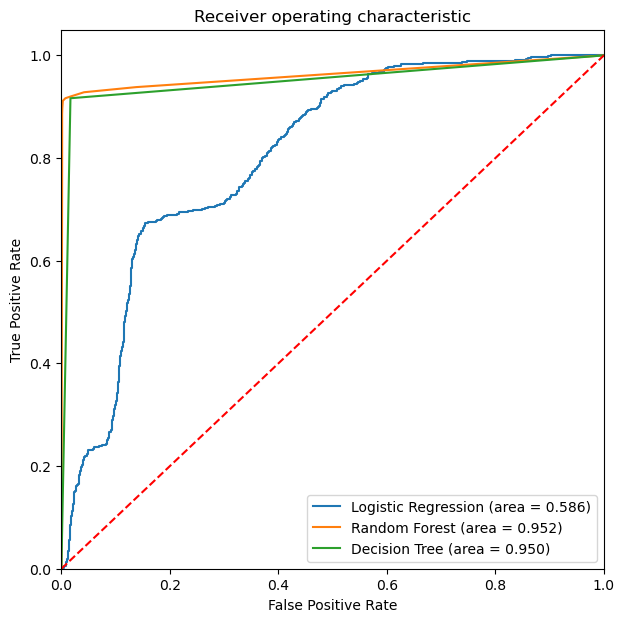

In [89]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.3f)' % dt_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

 From the above AUC-ROC plot we can confirm that the best model to use is Random Forest.

# Issues Identified:

1. employees should be given less Working Hrs
2. Number of projects assigned should not be more than 5
3. Employee renumeration should be increased